# Contents

 # **Chapter 1**

## System setup

In [192]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import display
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [96]:
pd.set_option("max_rows", 10) # max de ligne imprimer 
pd.set_option("max_columns",10) # nombre de ligne à afficher 
pd.set_option("precision", 5) # nombre de chiffre significatif des valeurs apres la virgule
pd.set_option("colheader_justify", "center")# pour centrer les variables 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing data

In [189]:
data = pd.read_csv("data/ParisHousing/ParisHousing.csv", sep=',', delimiter=None, header='infer',names=None, index_col=None, usecols=None)

## Exploratory data analysis

### Description and exploration of the dataset

In [98]:
data.describe()

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,...,basement,attic,garage,hasGuestRoom,price
count,10000.000,10000.000,10000.000,10000.000,10000.000,...,10000.000,10000.000,10000.000,10000.000,10000.000
mean,4999.500,49870.131,50.276,50225.486,5.510,...,5033.104,5028.011,553.121,4.995,4993447.526
std,2886.896,28774.375,28.889,29006.676,2.872,...,2876.730,2894.332,262.050,3.176,2877424.110
min,0.000,89.000,1.000,3.000,1.000,...,0.000,1.000,100.000,0.000,10313.500
25%,2499.750,25098.500,25.000,24693.750,3.000,...,2559.750,2512.000,327.750,2.000,2516401.950
50%,4999.500,50105.500,50.000,50693.000,5.000,...,5092.500,5045.000,554.000,5.000,5016180.300
75%,7499.250,74609.750,76.000,75683.250,8.000,...,7511.250,7540.500,777.250,8.000,7469092.450
max,9999.000,99999.000,100.000,99953.000,10.000,...,10000.000,10000.000,1000.000,10.000,10006771.200


In [99]:
data.head(10)

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,...,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,...,False,7,7559081.500,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,...,True,2,8085989.500,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,...,True,9,5574642.100,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,...,False,3,3232561.200,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,...,True,4,7055052.000,Luxury,has pool and has yard
5,5,39223,thirty-six,17,39489,...,False,1,3926647.200,Basic,has pool and no yard
6,6,58682,ten,99,6450,...,False,5,5876376.500,Luxury,has pool and has yard
7,7,86929,one hundred,11,98155,...,False,10,8696869.300,Basic,no pool and has yard
8,8,51522,three,61,9047,...,True,5,5154055.200,Basic,no pool and no yard
9,9,39686,forty-two,15,71019,...,True,3,3970892.100,Basic,no pool and no yard


In [100]:
print("Dimension of the data : {}".format(data.shape))
print("=================================================================")
print("Description of the variables :")
data.info()

Dimension of the data : (10000, 18)
Description of the variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  pric

In [101]:
# Index verfication
print("Index verification : {}".format(data.index))
print("=================================================================")
# Duplicate Label Detection
print("Duplicate Label Detection : {} = No duplicated labels".format(data.columns.is_unique))
print("=================================================================")
# Duplicate Index Detection
print("Duplicate Index Detection : {} = No duplicated Indexes".format(data.index.is_unique))
print("=================================================================")

Index verification : RangeIndex(start=0, stop=10000, step=1)
Duplicate Label Detection : True = No duplicated labels
Duplicate Index Detection : True = No duplicated Indexes


In [102]:
# Missing values handling
def missing(df):
    na_pourcentage = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    return na_pourcentage

In [103]:
print("The dataset contains no missing values. \n")
print(missing(data))
print("=================================================================")

The dataset contains no missing values. 

Unnamed: 0      0.000
squareMeters    0.000
category        0.000
price           0.000
hasGuestRoom    0.000
                 ... 
cityPartRange   0.000
cityCode        0.000
floors          0.000
numberOfRooms   0.000
PoolAndYard     0.000
Length: 18, dtype: float64


### Outliers handling

Verification of outliers and symmetry (`Price` variable case) :


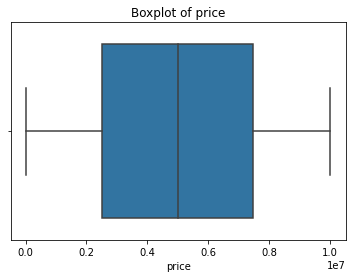

Comment : 


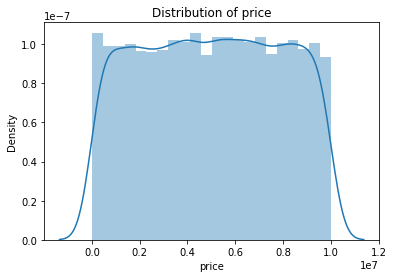

Comment : 


In [104]:
print("Verification of outliers and symmetry (`Price` variable case) :")
sns.boxplot(data['price']);
plt.title("Boxplot of price")
plt.show()
print("Comment : ")
print("=================================================================")
#On cherche à savoir si la variable est symétrique ou pas
sns.distplot(data['price']);
plt.title("Distribution of price")
plt.show()
print("Comment : ")
print("=================================================================")

### Data Visualization

In [105]:
### HTML layout display setup
from IPython.core.display import HTML
HTML("""<style>
.output_png {display: table-cell; text-align: center; vertical-align: middle;}
</style>""")

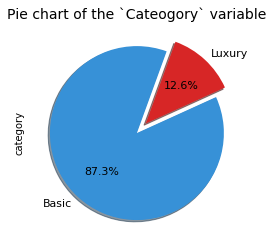

In [106]:
#Création d'un camembert de la variable Category pour les 2 modalités : Basic et Luxury
plt.title("Pie chart of the `Cateogory` variable", fontsize=14)
labels ="Basic", "Luxury"
colors = ["#3791D7", "#D72626"]
dt = data["category"].value_counts()
dt.plot.pie(explode=[0,0.15], autopct='%1.1f%%', shadow=True, colors=colors, labels=labels, fontsize=11, startangle=70);
plt.show();

Comment : There are a majority of the houses (`87.3%`) are classed as `basic` house and the `luxury` ones are accounted for `12.6%`.

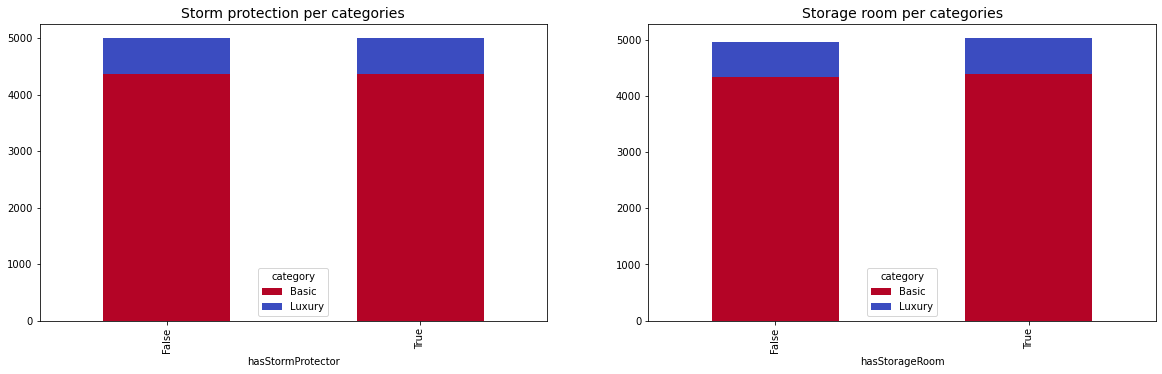

In [107]:
fig = plt.figure(figsize=(20,12)) 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

cmap = plt.cm.coolwarm_r

loans_by_region = data.groupby(['hasStormProtector', 'category']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Storm protection per categories', fontsize=14)

loans_by_grade = data.groupby(['hasStorageRoom', 'category']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Storage room per categories', fontsize=14);


Comment : 

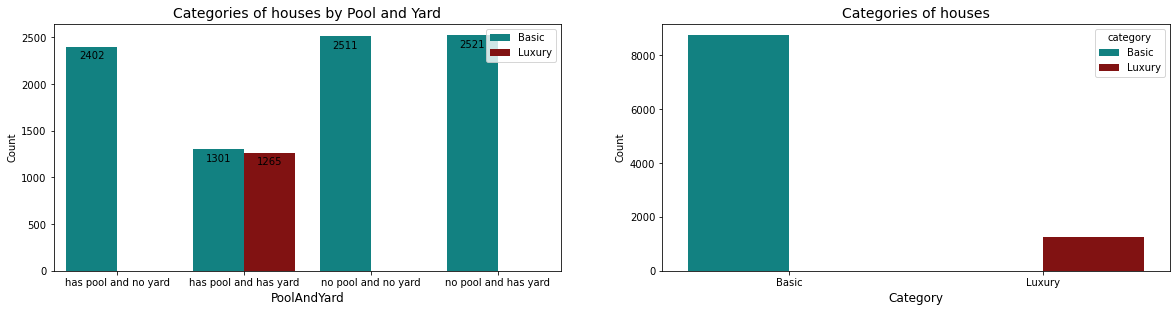

In [108]:
plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='PoolAndYard', data=data, 
                  palette=palette, hue='category')

ax.set_title('Categories of houses by Pool and Yard', fontsize=14)
ax.set_xlabel('PoolAndYard', fontsize=12)
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -9), 
                   textcoords = 'offset points')
ax.legend(loc='upper right')

plt.subplot(222)
ax1 = sns.countplot(x='category', data=data, 
                   palette=palette, hue='category')

# ax1 = sns.histplot(x='category', hue='category', data=data, palette=palette);
ax1.set_title('Categories of houses', fontsize=14)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Count')  

# for p in ax.patches:
#     ax1.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, -9), 
#                    textcoords = 'offset points')

low = data['PoolAndYard'].loc[data['category'] == 'Basic'].values
high = data['PoolAndYard'].loc[data['category'] == 'Luxury'].values



Comment : 

### Descriptive Statistics

In [109]:
data.describe() # description des valeurs numériques 

,Unnamed: 0,squareMeters,floors,cityCode,cityPartRange,...,basement,attic,garage,hasGuestRoom,price
count,10000.000,10000.000,10000.000,10000.000,10000.000,...,10000.000,10000.000,10000.000,10000.000,10000.000
mean,4999.500,49870.131,50.276,50225.486,5.510,...,5033.104,5028.011,553.121,4.995,4993447.526
std,2886.896,28774.375,28.889,29006.676,2.872,...,2876.730,2894.332,262.050,3.176,2877424.110
min,0.000,89.000,1.000,3.000,1.000,...,0.000,1.000,100.000,0.000,10313.500
25%,2499.750,25098.500,25.000,24693.750,3.000,...,2559.750,2512.000,327.750,2.000,2516401.950
50%,4999.500,50105.500,50.000,50693.000,5.000,...,5092.500,5045.000,554.000,5.000,5016180.300
75%,7499.250,74609.750,76.000,75683.250,8.000,...,7511.250,7540.500,777.250,8.000,7469092.450
max,9999.000,99999.000,100.000,99953.000,10.000,...,10000.000,10000.000,1000.000,10.000,10006771.200


Comment :

In [110]:
# Verfication of the categorical variables in the dataset
cat = [col for col in data.columns if data[col].dtype=='O']
print("Categoricals variables in the dataset : \n{}".format(cat))
print("====================================================================")
for col in cat:
    print(f"The variable `{col}` contains {data[col].nunique()} unique values.") 
print("====================================================================")
print("Descritpion of these values :")
display(data.describe(include=['object']))
print("====================================================================")


Categoricals variables in the dataset : 
['numberOfRooms', 'category', 'PoolAndYard']
The variable `numberOfRooms` contains 100 unique values.
The variable `category` contains 2 unique values.
The variable `PoolAndYard` contains 4 unique values.
Descritpion of these values :


,numberOfRooms,category,PoolAndYard
count,10000,10000,10000
unique,100,2,4
top,fifty-four,Basic,has pool and has yard
freq,129,8735,2566


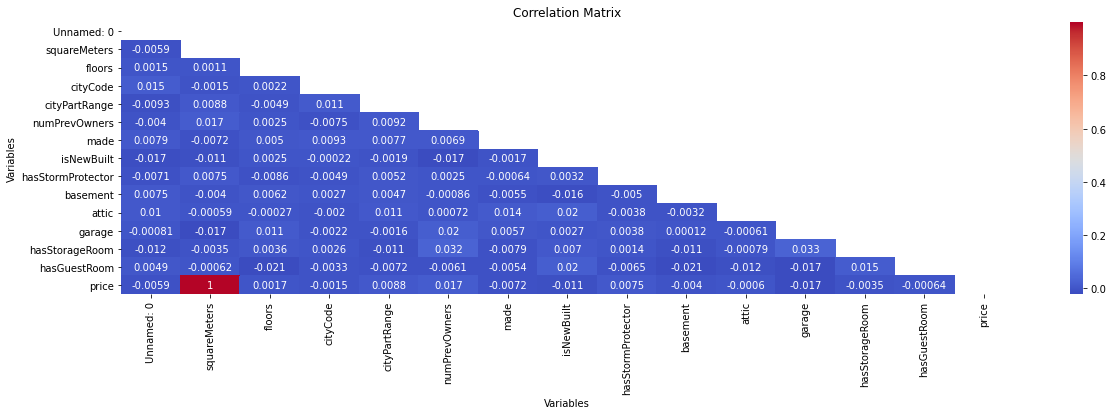

In [111]:
plt.subplots(figsize=(20, 5));
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm", mask = np.triu(data.corr()));
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables");

Comment : 

In [112]:
# Removal of highly correlated variable
data = data.drop('squareMeters', axis = 1)

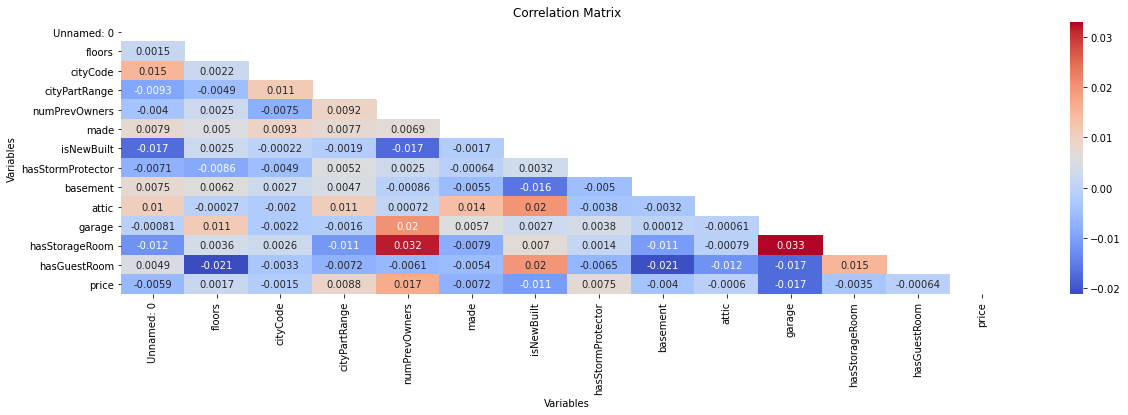

In [113]:
plt.subplots(figsize=(20, 5));
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm", mask = np.triu(data.corr()));
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables");

### Processing the `numberOfRooms` variable

The `numberOfRooms` variable is `categorical` in the dataset and we are going to define a function (`parse_int()`) that will parse the text and convert it to `numeric` type in order to use it in the prediction part of this report. <span style = "color : red;">This function was found online...</span>

In [114]:
# Processing the `numberOfRooms` variable
def parse_int(textnum, numwords={}):
    # create our default word-lists
    if not numwords:

      # singles
      units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
      ]

      # tens
      tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

      # larger scales
      scales = ["hundred", "thousand", "million", "billion", "trillion"]

      # divisors
      numwords["and"] = (1, 0)

      # perform our loops and start the swap
      for idx, word in enumerate(units):    numwords[word] = (1, idx)
      for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
      for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

    # primary loop
    current = result = 0
    # loop while splitting to break into individual words
    for word in textnum.replace("-"," ").split():
        # if problem then fail-safe
        if word not in numwords:
          raise Exception("Illegal word: " + word)

        # use the index by the multiplier
        scale, increment = numwords[word]
        current = current * scale + increment
       
        # if larger than 100 then push for a round 2
        if scale > 100:
            result += current
            current = 0

    # return the result plus the current
    return result + current

In [115]:
values = []
for i in data['numberOfRooms']:
    values.append(parse_int(i, numwords={}))
keys = data.numberOfRooms[0:9].tolist()
print("Verification of the process (10 first observations) : \n{}".format(dict(zip(keys, values))))
print("====================================================================================")
print("Replacing the values of the `numberOfRooms` variable by the new processed values.")
data["numberOfRooms"]=values
print("====================================================================================")

Verification of the process (10 first observations) : 
{'three': 3, 'thirty-nine': 39, 'fifty-eight': 58, 'forty-seven': 47, 'nineteen': 19, 'thirty-six': 36, 'ten': 10, 'one hundred': 100}
Replacing the values of the `numberOfRooms` variable by the new processed values.


### Encoding of some variables

In [116]:
# `category` variable encoding
print("`category` variable encoding (labels : basic = 0, luxury = 1).")
enc = {'Basic':0, 'Luxury':1}
data['category'] = data['category'].map(enc)
print("====================================================================================")
# `hasStormProtector` variable encoding
print("`hasStormProtector` variable processing (labels : False = 0, True = 1)")
data=data.replace(False, 0)
data=data.replace(True, 1)
print("====================================================================================")
# verficiation of categorical variables in the data set at this point
var_OHE = [col for col in data.columns if data[col].dtype=='O']
print("Categorical variables in the dataset at tis point  : ", var_OHE)
print('\nHot encoding of these variables : {}'.format(var_OHE))
for col in var_OHE:
    data = pd.get_dummies(data, columns = [col], prefix=col+'_')
print("====================================================================================")

`category` variable encoding (labels : basic = 0, luxury = 1).
`hasStormProtector` variable processing (labels : False = 0, True = 1)
Categorical variables in the dataset at tis point  :  ['PoolAndYard']

Hot encoding of these variables : ['PoolAndYard']


### Removal of variables deemed irrelevant to the models.

- `cityCode`,    `made`,     `Unnamed: 0`

In [117]:
data = data.drop(["cityCode",  "made", "Unnamed: 0"], axis=1)

In [118]:
data.columns

Index(['numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners',
       'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage',
       'hasStorageRoom', 'hasGuestRoom', 'price', 'category',
       'PoolAndYard__has pool and has yard',
       'PoolAndYard__has pool and no yard',
       'PoolAndYard__no pool and has yard',
       'PoolAndYard__no pool and no yard'],
      dtype='object')

Comment :

In [119]:
print("Dimension of the dataset at this point  : {}".format(data.shape))
print("====================================================================================")
print("Overview of the data :")
display(data.head())
print("====================================================================================")

Dimension of the dataset at this point  : (10000, 17)
Overview of the data :


,numberOfRooms,floors,cityPartRange,numPrevOwners,isNewBuilt,...,category,PoolAndYard__has pool and has yard,PoolAndYard__has pool and no yard,PoolAndYard__no pool and has yard,PoolAndYard__no pool and no yard
0,3,63,3,8,0,...,0,0,1,0,0
1,39,98,8,6,1,...,1,1,0,0,0
2,58,19,6,8,0,...,0,0,1,0,0
3,47,6,10,4,0,...,0,0,0,0,1
4,19,90,3,7,1,...,1,1,0,0,0


The variable `category` is the target in this case.

In [120]:
print("Distribution of the target :")
print("Labels : 0 = Basic, 1 = Luxury")
data.category.value_counts(normalize=True)

Distribution of the target :
Labels : 0 = Basic, 1 = Luxury


0   0.874
1   0.127
Name: category, dtype: float64

## Models specification

In [121]:
X = data.drop('category', axis=1)
X = normalize(X.values)
y = data['category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= .4)

### Model Accuracy function 

In [122]:
def model_accuracy(model):
    """Perform the fitting, print out the accuracy, classification report and confusion matrix with the given model

    Args:
        model(string) : model to perform. 'svm' : Support Vector Machine, 'knn' : K-Nearest Neighbors.

    Returns:
        classifier: model fit to the train set.
    """
    if model == 'svm':
        print("Support Vector Machine model")
        model_svm = SVC(kernel='linear').fit(X_train,y_train)
        predictions_test = model_svm.predict(X_test)
        print("=========================================================================")
        print('Accuracy on the train set : {:04.3f}'.format(model_svm.score(X_train, y_train)))
        print("=========================================================================")
        print('Base model accuracy on the test set : {:04.3f}'.format(model_svm.score(X_test, y_test)))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_svm, X_test, y_test, cmap='Reds', values_format='d',
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_svm
    
    elif model == 'knn':
        print("K-Nearest Neighbors model")
        # fitting  
        model_knn = KNeighborsClassifier().fit(X_train, y_train)
        predictions_test = model_knn.predict(X_test)
        print("=========================================================================")
        print('Accuracy on the train set : {:04.3f}'.format(model_knn.score(X_train, y_train)))
        print("=========================================================================")
        print('Base model accuracy on the test set : {:04.3f}'.format(model_knn.score(X_test, y_test)))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_knn, X_test, y_test, cmap='Reds', values_format='d',
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_knn
    
    elif model == 'lda':
        print("Linear Discriminant Analysis")
        # fitting  
        model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
        predictions_test = model_lda.predict(X_test)
        print("=========================================================================")
        print('Accuracy on the train set : {:04.3f}'.format(model_lda.score(X_train, y_train)))
        print("=========================================================================")
        print('Base model accuracy on the test set : {:04.3f}'.format(model_lda.score(X_test, y_test)))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_lda, X_test, y_test, cmap='Reds', values_format='d',
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_lda
    
    elif model == 'logreg':
        print("Linear Discriminant Analysis")
        # fitting  
        model_logreg = LogisticRegression().fit(X_train, y_train)
        predictions_test = model_logreg.predict(X_test)
        print("=========================================================================")
        print('Accuracy on the train set : {:04.3f}'.format(model_logreg.score(X_train, y_train)))
        print("=========================================================================")
        print('Base model accuracy on the test set : {:04.3f}'.format(model_logreg.score(X_test, y_test)))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_logreg, X_test, y_test, cmap='Reds', values_format='d',
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_logreg
    
    else :
        print("Enter a valid choice.")

### kNN

K-Nearest Neighbors model
Accuracy on the train set : 0.877
Base model accuracy on the test set : 0.857
Classification report : 
              precision    recall  f1-score   support

           0      0.872     0.979     0.923      3492
           1      0.098     0.016     0.027       508

    accuracy                          0.857      4000
   macro avg      0.485     0.497     0.475      4000
weighted avg      0.774     0.857     0.809      4000

Confusion matrix : 


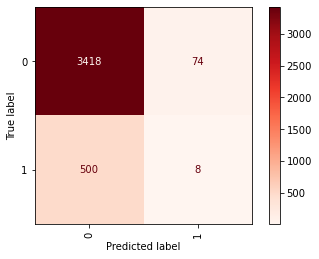

In [123]:
model_knn = model_accuracy('knn')

### SVM

Support Vector Machine model
Accuracy on the train set : 0.874
Base model accuracy on the test set : 0.873
Classification report : 
              precision    recall  f1-score   support

           0      0.873     1.000     0.932      3492
           1      1.000     0.000     0.000       508

    accuracy                          0.873      4000
   macro avg      0.936     0.500     0.466      4000
weighted avg      0.889     0.873     0.814      4000

Confusion matrix : 


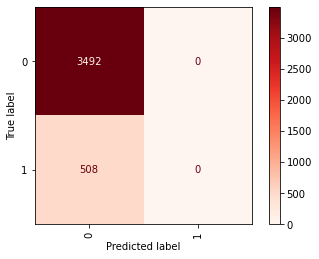

In [124]:
model_svm = model_accuracy('svm')

### LDA

Linear Discriminant Analysis
Accuracy on the train set : 0.875
Base model accuracy on the test set : 0.875
Classification report : 
              precision    recall  f1-score   support

           0      0.876     0.998     0.933      3492
           1      0.682     0.030     0.057       508

    accuracy                          0.875      4000
   macro avg      0.779     0.514     0.495      4000
weighted avg      0.851     0.875     0.822      4000

Confusion matrix : 


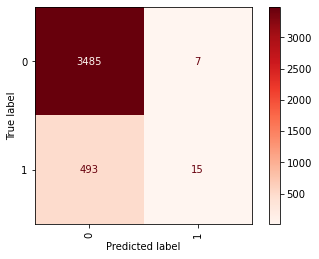

In [125]:
model_lda = model_accuracy('lda')

#### Conclusion

### LOGREG

Linear Discriminant Analysis
Accuracy on the train set : 0.874
Base model accuracy on the test set : 0.873
Classification report : 
              precision    recall  f1-score   support

           0      0.873     1.000     0.932      3492
           1      1.000     0.000     0.000       508

    accuracy                          0.873      4000
   macro avg      0.936     0.500     0.466      4000
weighted avg      0.889     0.873     0.814      4000

Confusion matrix : 


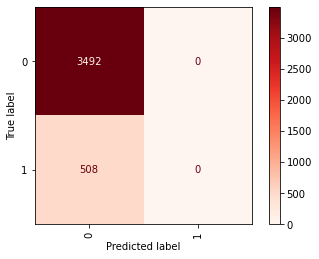

In [126]:
model_logreg = model_accuracy('logreg')

### Score Summary function

In [127]:
def score_summary(model_logreg, model_knn, model_svm, model_lda):
    
    models = [] # append all models or predictive models 
    score_results = [] # cross validation result

    models.append(model_logreg)
    models.append(model_knn)
    models.append(model_svm)
    models.append(model_lda)

    for model in models :
        score_results.append(model.score(X_test, y_test)*100)
            
    cv_frame = pd.DataFrame(
        {
            "Algorithms":[
                        "LogisticRegression",
                        "KNeighboors",
                        "SupportVectorMachines",                      
                        "LinearDiscriminantAnalysis"
                        ],
            "score_results":score_results
        })

    cv_plot = sns.barplot(x="score_results",y="Algorithms", data = cv_frame,
                    palette="Paired", orient = "h");

    for p in cv_plot.patches:
        _x = p.get_x() + p.get_width() - 8
        _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
        value = '{:.2f}%'.format(p.get_width())
        cv_plot.text(_x, _y, value, ha="left")

    cv_plot.set_xlabel("Accuracy")
    cv_plot = cv_plot.set_title("Algorithms Scores Graph");

### ROC curve analysis

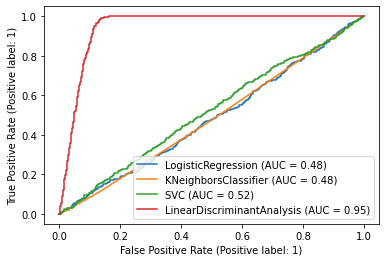

In [128]:
from sklearn.metrics import plot_roc_curve

classifiers = [model_logreg, model_knn, model_svm, model_lda]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax = ax)

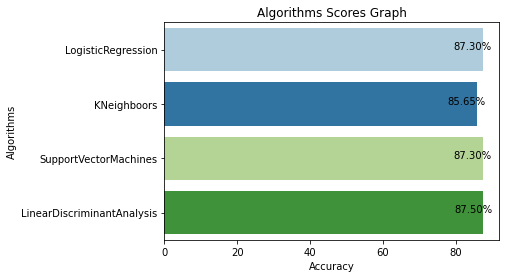

In [129]:
score_summary(model_logreg, model_knn, model_svm, model_lda)

### Undersampling

In [130]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_rus, y_rus = rus.fit_resample(X, y)
print('Original dataset shape : ', Counter(y))
print('Resample dataset shape : ', Counter(y_rus))

Original dataset shape :  Counter({0: 8735, 1: 1265})
Resample dataset shape :  Counter({0: 1265, 1: 1265})


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state=42, test_size=.3)

### kNN

K-Nearest Neighbors model
Accuracy on the train set : 0.671
Base model accuracy on the test set : 0.485
Classification report : 
              precision    recall  f1-score   support

           0      0.482     0.507     0.494       377
           1      0.488     0.463     0.475       382

    accuracy                          0.485       759
   macro avg      0.485     0.485     0.485       759
weighted avg      0.485     0.485     0.485       759

Confusion matrix : 


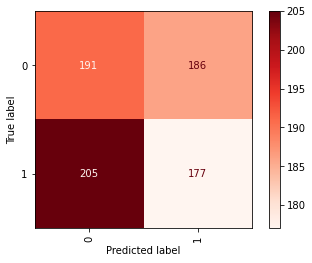

In [132]:
model_knn_rus = model_accuracy('knn')

### SVM

Support Vector Machine model
Accuracy on the train set : 0.501
Base model accuracy on the test set : 0.497
Classification report : 
              precision    recall  f1-score   support

           0      0.497     1.000     0.664       377
           1      1.000     0.000     0.000       382

    accuracy                          0.497       759
   macro avg      0.748     0.500     0.332       759
weighted avg      0.750     0.497     0.330       759

Confusion matrix : 


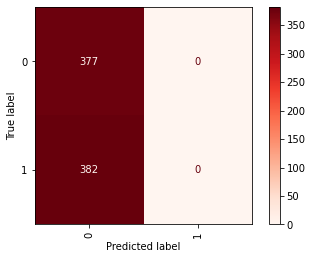

In [133]:
model_svm_rus = model_accuracy('svm')

### LDA

Linear Discriminant Analysis
Accuracy on the train set : 0.922
Base model accuracy on the test set : 0.914
Classification report : 
              precision    recall  f1-score   support

           0      0.943     0.881     0.911       377
           1      0.889     0.948     0.918       382

    accuracy                          0.914       759
   macro avg      0.916     0.914     0.914       759
weighted avg      0.916     0.914     0.914       759

Confusion matrix : 


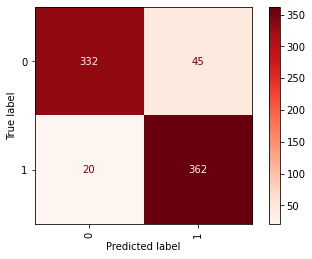

In [134]:
model_lda_rus = model_accuracy('lda')

### LOGREG

Linear Discriminant Analysis
Accuracy on the train set : 0.501
Base model accuracy on the test set : 0.497
Classification report : 
              precision    recall  f1-score   support

           0      0.497     1.000     0.664       377
           1      1.000     0.000     0.000       382

    accuracy                          0.497       759
   macro avg      0.748     0.500     0.332       759
weighted avg      0.750     0.497     0.330       759

Confusion matrix : 


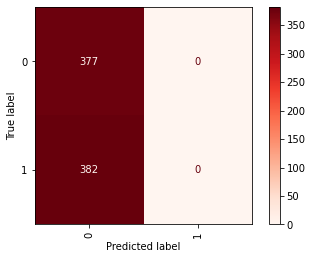

In [167]:
model_logreg_rus = model_accuracy('logreg')

After undersampling : 


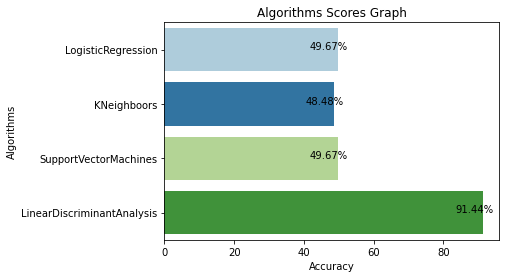

In [168]:
print("After undersampling : ")
score_summary(model_logreg_rus, model_knn_rus, model_svm_rus, model_lda_rus)

### ROC curve analysis

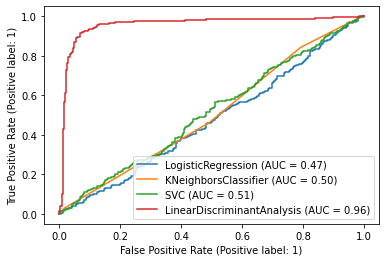

In [138]:
from sklearn.metrics import plot_roc_curve

classifiers = [model_logreg_rus, model_knn_rus, model_svm_rus, model_lda_rus]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax = ax)

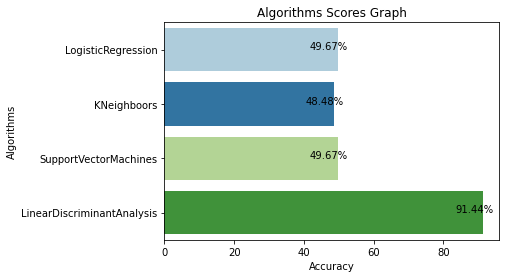

In [139]:
score_summary(model_logreg_rus, model_knn_rus, model_svm_rus, model_lda_rus)

#### Hyperparameters tuning

##### Hyperparameters grids and fitting

In [182]:
# Define the grids of parameters

param_grid_knn = {
    'n_neighbors': [i for i in range(2, 16)],
    'weights':['distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[2, 3, 4],
    'p':[1, 2],
    'metric':['manhattan', 'minkowski']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

param_grid_logreg = {
    'penalty' : ['l1', 'none'], 
    'C' : np.logspace(-4, 4, 5), 
    'solver': ['newton-cg','sag', 'lbfgs']
}

In [141]:
# kNN
# Instantiate the grid search model
grid_knn = GridSearchCV(estimator = model_knn_rus, param_grid = param_grid_knn, cv = 5, n_jobs=-1)
# Fit the grid search to the data
best_knn_grid = grid_knn.fit(X_train, y_train)

In [153]:
# SVM
# Instantiate the grid search model
grid_svm = GridSearchCV(estimator = model_svm_rus, param_grid = param_grid_svm, cv = 5, n_jobs=-1)
# Fit the grid search to the data
best_svm_grid = grid_svm.fit(X_train, y_train)

In [ ]:
# logreg
# Instantiate the grid search model
grid_logreg = GridSearchCV(estimator = model_logreg_rus, param_grid = param_grid_logreg, cv = 5, n_jobs=-1)
# Fit the grid search to the data
best_logreg_grid = grid_logreg.fit(X_train, y_train)

##### Tuning function

In [147]:
def tuning(model):
    """Perform tuning of the models parameters

    Args:
        model: perfomed models by the model_accuracy() function
    """
    if model == 'knn':
        
        print('KNN best parameters :\n', best_knn_grid.best_params_)
        best_knn_model = best_knn_grid.best_estimator_
        print("==============================================================================")
        print("KNN final model :\n", best_knn_model)
        print("==============================================================================")
        print('Fitting to the train set : {:04.3f}'.format(best_knn_model.score(X_train, y_train)))
        print("==============================================================================")
        score_best_knn = best_knn_model.score(X_test, y_test)
        print('Final model Accuracy : {:04.3f}'.format(score_best_knn))
        print("==============================================================================")
        score_base_knn = model_knn_rus.score(X_test, y_test)
        print("Base model accuracy : {:04.3f}".format(score_base_knn))
        print("==============================================================================")
        print("Classification report : ")
        best_knn_pred = best_knn_model.predict(X_test)
        print(classification_report(y_test, best_knn_pred, 
                                    digits=3, zero_division = 1))
        print("==============================================================================")
        print("Confusion matrix : ")
        disp = plot_confusion_matrix(best_knn_model, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation='vertical')
        return best_knn_model
    
    elif model == 'svm':
        
        print('SVM best parameters :', best_svm_grid.best_params_)
        best_svm_model = best_svm_grid.best_estimator_
        print("==============================================================================")
        print("SVM final model :", best_svm_model)
        print("==============================================================================")
        print('Fitting to the train set : {:04.3f}'.format(best_svm_model.score(X_train, y_train)))
        print("==============================================================================")
        score_best_svm = best_svm_model.score(X_test, y_test)
        print('Final model Accuracy : {:04.3f}'.format(score_best_svm))
        print("==============================================================================")
        score_base_svm = model_svm_rus.score(X_test, y_test)
        print("Base model accuracy : {:04.3f}".format(score_base_svm))
        print("==============================================================================")
        print("Classification report : ")
        best_svm_pred = best_svm_model.predict(X_test)
        print(classification_report(y_test, best_svm_pred, 
                                    digits=3, zero_division = 1))
        print("==============================================================================")
        print("Confusion matrix : ")
        disp = plot_confusion_matrix(best_svm_model, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation='vertical')
        return best_svm_model
    
    elif model == 'logreg':
        
        print('Logistic Regression best parameters :\n', best_logreg_grid.best_params_)
        best_logreg_model = best_logreg_grid.best_estimator_
        print("==============================================================================")
        print("Logistic Regression final model :\n", best_logreg_model)
        print("==============================================================================")
        print('Fitting to the train set : {:04.3f}'.format(best_logreg_model.score(X_train, y_train)))
        print("==============================================================================")
        score_best_logreg = best_logreg_model.score(X_test, y_test)
        print('Final model Accuracy : {:04.3f}'.format(score_best_logreg))
        print("==============================================================================")
        score_base_logreg = model_logreg_rus.score(X_test, y_test)
        print("Base model accuracy : {:04.3f}".format(score_base_logreg))
        print("==============================================================================")
        print("Classification report : ")
        best_logreg_pred = best_logreg_model.predict(X_test)
        print(classification_report(y_test, best_logreg_pred, 
                                    digits=3, zero_division = 1))
        print("==============================================================================")
        print("Confusion matrix : ")
        disp = plot_confusion_matrix(best_logreg_model, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation='vertical')
        return best_logreg_model
    
    else :
        print("'Enter a valid option...")

#### Tuning of the models

KNN best parameters :
 {'algorithm': 'auto', 'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
KNN final model :
 KNeighborsClassifier(leaf_size=2, n_neighbors=7, weights='distance')
Fitting to the train set : 1.000
Final model Accuracy : 0.522
Base model accuracy : 0.485
Classification report : 
              precision    recall  f1-score   support

           0      0.517     0.573     0.543       377
           1      0.528     0.471     0.498       382

    accuracy                          0.522       759
   macro avg      0.522     0.522     0.521       759
weighted avg      0.522     0.522     0.521       759

Confusion matrix : 


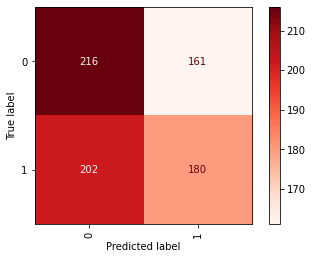

In [148]:
best_knn_model_out = tuning('knn')

Logistic Regression best parameters :
 {'C': 0.0001, 'penalty': 'none', 'solver': 'newton-cg'}
Logistic Regression final model :
 LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')
Fitting to the train set : 0.973
Final model Accuracy : 0.971
Base model accuracy : 0.497
Classification report : 
              precision    recall  f1-score   support

           0      1.000     0.942     0.970       377
           1      0.946     1.000     0.972       382

    accuracy                          0.971       759
   macro avg      0.973     0.971     0.971       759
weighted avg      0.973     0.971     0.971       759

Confusion matrix : 


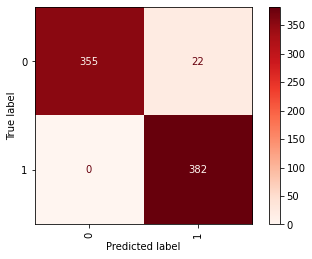

In [184]:
best_logreg_model_out = tuning('logreg')

SVM best parameters : {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM final model : SVC(C=0.1, gamma=0.1)
Fitting to the train set : 0.501
Final model Accuracy : 0.497
Base model accuracy : 0.497
Classification report : 
              precision    recall  f1-score   support

           0      0.497     1.000     0.664       377
           1      1.000     0.000     0.000       382

    accuracy                          0.497       759
   macro avg      0.748     0.500     0.332       759
weighted avg      0.750     0.497     0.330       759

Confusion matrix : 


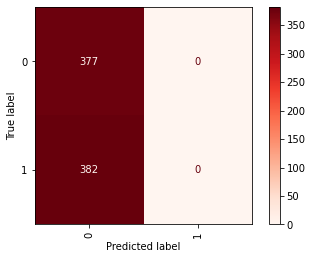

In [154]:
best_svm_model_out = tuning('svm')

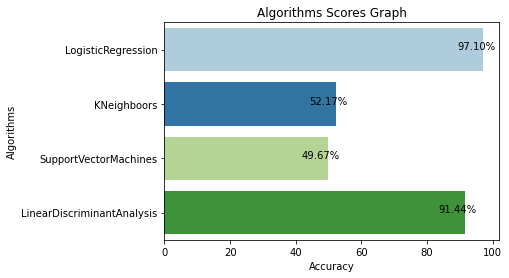

In [155]:
score_summary(best_logreg_model_out, best_knn_model_out, best_svm_model_out, model_lda_rus)

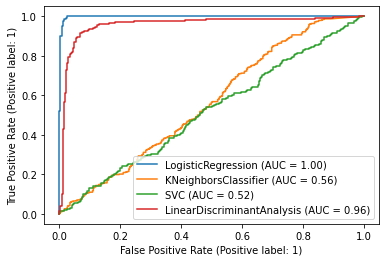

In [157]:
classifiers = [best_logreg_model_out, best_knn_model_out, best_svm_model_out, model_lda_rus]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax = ax)

## Findings

#### Conclusion

## Trash

### ads

In [ ]:
# # define lists to collect scores
# train_scores, test_scores = list(), list()
# # define the tree depths to evaluate
# values = [i for i in range(1, 16)]
# # evaluate a decision tree for each depth
# for i in values:
# 	# configure the model
# 	model = KNeighborsClassifier(n_neighbors=i)
# 	# fit model on the training dataset
# 	model.fit(X_train, y_train)
# 	# evaluate on the train dataset
# 	train_yhat = model.predict(X_train)
# 	train_acc = accuracy_score(y_train, train_yhat)
# 	train_scores.append(train_acc)
# 	# evaluate on the test dataset
# 	test_yhat = model.predict(X_test)
# 	test_acc = accuracy_score(y_test, test_yhat)
# 	test_scores.append(test_acc)
# 	# summarize progress
# 	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# # plot of train and test scores vs number of neighbors
# plt.plot(values, train_scores, '-o', label='Train')
# plt.plot(values, test_scores, '-o', label='Test')
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.pipeline import Pipeline
# for name, estimator, grid in zip(names, estimators, grids):
#     # clf_pipe = Pipeline([
#     #     ('clf', estimator),
#     # ])
#     gs_clf = GridSearchCV(estimator=estimator, param_grid=grid, n_jobs=-1)
#     clf = gs_clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print("{} score: {:.3f}".format(name, score))

In [ ]:
# for grid, estimator in zip(grids, estimators) :
#     # estimator = estimators[grid]
#     best_params = []
#     grid_S = GridSearchCV(estimator=estimator, param_grid=grid, cv=5, n_jobs=-1)
#     grid_S_out = grid_S.fit(X_train, y_train).best_estimator_
#     best_params = best_params.append(grid_S_out)

In [ ]:
# for grid, estimator in zip(grids, estimators) :
#     print(grid,'for', estimator)

In [ ]:
# for grid in grids :
#     estimator = estimators[i]
#     print(grid, estimator)

In [130]:

# # Instantiate the grid search model
# grid = GridSearchCV(estimator = model_knn, param_grid = param_grid_knn, cv = 5, n_jobs=-1)
# # Fit the grid search to the data
# best_knn_grid = grid.fit(X_train, y_train)

In [ ]:
# best_knn_grid.best_estimator_

In [ ]:
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.scatter(lda.fit_transform(X, y)[:,0],lda.fit_transform(X_train, y_train)[:,1],c=y,cmap='rainbow',edgecolors='r')

In [35]:
# best_knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=15)

In [36]:
# def tuning(model):
#     """Perform tuning of the models parameters

#     Args:
#         model: perfomed models by the model_accuracy() function
#     """
#     if model == 'svm':
#         pass
    
#     elif model == 'knn':
        
#         print('KNN best parameters :', best_knn_grid.best_params_)
#         best_knn_model = best_knn_grid.best_estimator_
#         print("==============================================================================")
#         print("KNN final model :", best_knn_model)
#         print("==============================================================================")
#         print('Fitting to the train set : {:04.3f}'.format(best_knn_model.score(X_train, y_train)))
#         print("==============================================================================")
#         score_best_knn = best_knn_model.score(X_test, y_test)
#         print('Final model Accuracy : {:04.3f}'.format(score_best_knn))
#         print("==============================================================================")
#         score_base_knn = model_knn.score(X_test, y_test)
#         print("Base model accuracy : {:04.3f}".format(score_base_knn))
#         print("==============================================================================")
#         print("Classification report : ")
#         best_knn_pred = best_knn_model.predict(X_test)
#         print(classification_report(y_test, best_knn_pred, 
#                                     digits=3, zero_division = 1))
#         print("==============================================================================")
#         print("Confusion matrix : ")
#         disp = plot_confusion_matrix(best_knn_model, X_test, y_test, cmap='Reds', values_format='d',
#                                     xticks_rotation='vertical')
#     else :
#         print("'Enter a valid option...")

In [ ]:
# tuning('knn')

#### SVM

In [38]:
# model_svm = model_accuracy('svm')

In [39]:
# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [1,0.1,0.01],
#     # 'kernel': ['rbf', 'poly', 'sigmoid']
#     }

In [40]:
# grid = GridSearchCV(estimator=model_svm,param_grid= param_grid, cv=5, n_jobs=-1)
# grid.fit(X_train,y_train)

In [41]:
# print(grid.best_estimator_)

In [42]:
# grid_predictions = grid.predict(X_test)
# print(plot_confusion_matrix(grid.best_estimator_, X_test, y_test, cmap='Reds', values_format='d',
#                                     xticks_rotation='vertical'))
# print(classification_report(y_test,grid_predictions))
# # confusion_matrix(y_test, y_pred_svm, normalize='true')

In [43]:
# tuning('svm')

In [44]:
# # define lists to collect scores
# train_scores, test_scores = list(), list()
# # define the tree depths to evaluate
# values = [i for i in range(1, 21)]
# # evaluate a decision tree for each depth
# for i in values:
# 	# configure the model
# 	model = KNeighborsClassifier(n_neighbors=i)
# 	# fit model on the training dataset
# 	model.fit(X_train, y_train)
# 	# evaluate on the train dataset
# 	train_yhat = model.predict(X_train)
# 	train_acc = accuracy_score(y_train, train_yhat)
# 	train_scores.append(train_acc)
# 	# evaluate on the test dataset
# 	test_yhat = model.predict(X_test)
# 	test_acc = accuracy_score(y_test, test_yhat)
# 	test_scores.append(test_acc)
# 	# summarize progress
# 	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# # plot of train and test scores vs number of neighbors
# plt.plot(values, train_scores, '-o', label='Train')
# plt.plot(values, test_scores, '-o', label='Test')
# plt.legend()
# plt.show()

In [45]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
# clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [46]:
# pred = clf.predict(X_test)

In [47]:
# clf.score(X_test, y_test)

0.875

In [ ]:
# plot_confusion_matrix(clf, X_test, y_test, cmap='Reds', values_format='d', xticks_rotation= 'vertical')

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_rus, y_rus, random_state=0, test_size=.3)

In [ ]:
# clf=clf.fit_transform(X_train1, y_train1)

In [ ]:
# clf.score(X_test, y_test)

In [ ]:
# clf.score(X_test1, y_test1)

In [ ]:
# plot_confusion_matrix(clf, X_test1, y_test1, cmap='Reds', values_format='d', xticks_rotation= 'vertical')

In [ ]:
# from numpy import where

In [ ]:
# counter = Counter(y)
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
# 	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# plt.legend()
# plt.show()

In [ ]:
# data.columns

In [ ]:
# groups = data.groupby('category')
# for name, group in groups:
#     plt.plot(group[0], group[1], marker="o", linestyle="", label=name)
# plt.legend()

In [ ]:
# a = data.loc[data.category == 0]
# b = data.loc[data.category == 1]# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# rus = RandomUnderSampler(random_state=42, replacement=True)
# X_rus, y_rus = rus.fit_resample(X, y)
# print('Original dataset shape : ', Counter(y))
# print('Resample dataset shape : ', Counter(y_rus))
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# rus = RandomUnderSampler(random_state=42, replacement=True)
# X_rus, y_rus = rus.fit_resample(X, y)
# print('Original dataset shape : ', Counter(y))
# print('Resample dataset shape : ', Counter(y_rus))
# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state=0, test_size=.3)
# tuning('knn')

In [ ]:
# roc_auc_score(y_train, model_knn.predict(X_train))

In [ ]:
# roc_auc_score(y_test, model_knn.predict(X_test))

In [ ]:
# from sklearn.preprocessing import StandardScaler

# #Independent variables 
# X = data.drop('category',axis=1).values
# #Dependent variable
# y = data.category.values

# scaler=StandardScaler()
# X = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= .3)

In [ ]:
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
# plt.title('Train set')
# plt.subplot(122)
# plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
# plt.title('Test set');

In [ ]:
# clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
# scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
# scores.mean()

In [ ]:
# plot_confusion_matrix(clf, X_test, y_test, cmap='Reds', values_format='d',
#                                     xticks_rotation= 'vertical')

In [ ]:
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.scatter(lda.fit_transform(X, y)[:,0],lda.fit_transform(X_train, y_train)[:,1],c=y,cmap='rainbow',edgecolors='r')

#### Hyperparameters tuning

In [ ]:
# Define the grid of parameters
# param_grid = {
#     'n_neighbors': [i for i in range(2, 21)],
#     # 'n_neighbors': [5, 7, 10, 15],
#     # 'weights' : ['distance']
#     # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
#               'weights':['uniform', 'distance'],
#               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'leaf_size':[25, 30, 35, 40],
#               'p':[1, 2],
#               'metric':['manhattan', 'minkowski']
#              }
# param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
#               'leaf_size':[2, 3, 4]
#              }


# # Instantiate the grid search model
# grid = GridSearchCV(estimator = model_knn, param_grid = param_grid, cv = 5, n_jobs=-1)
# # Fit the grid search to the data
# best_knn_grid = grid.fit(X_train, y_train)

In [ ]:
# best_knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=15)

In [ ]:
# def tuning(model):
#     """Perform tuning of the models parameters

#     Args:
#         model: perfomed models by the model_accuracy() function
#     """
#     if model == 'svm':
#         pass
    
#     elif model == 'knn':
        
#         print('KNN best parameters :', best_knn_grid.best_params_)
#         best_knn_model = best_knn_grid.best_estimator_
#         print("==============================================================================")
#         print("KNN final model :", best_knn_model)
#         print("==============================================================================")
#         print('Fitting to the train set : {:04.3f}'.format(best_knn_model.score(X_train, y_train)))
#         print("==============================================================================")
#         score_best_knn = best_knn_model.score(X_test, y_test)
#         print('Final model Accuracy : {:04.3f}'.format(score_best_knn))
#         print("==============================================================================")
#         score_base_knn = model_knn.score(X_test, y_test)
#         print("Base model accuracy : {:04.3f}".format(score_base_knn))
#         print("==============================================================================")
#         print("Classification report : ")
#         best_knn_pred = best_knn_model.predict(X_test)
#         print(classification_report(y_test, best_knn_pred, 
#                                     digits=3, zero_division = 1))
#         print("==============================================================================")
#         print("Confusion matrix : ")
#         disp = plot_confusion_matrix(best_knn_model, X_test, y_test, cmap='Reds', values_format='d',
#                                     xticks_rotation='vertical')
#     else :
#         print("'Enter a valid option...")

In [ ]:
# tuning('knn')

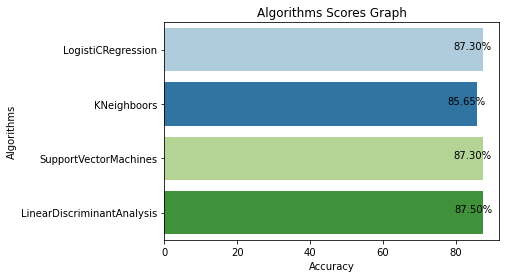

In [ ]:
# score_summary()

# Chapter 2

## System setup

In [185]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [196]:
data2 = pd.read_csv('data/covid19data/covidcases.csv', sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None)

In [200]:
display(data2.head())
print("Valeurs manquantes :", data2.isna().sum().sum(), "- La dimension de la data est:", data2.shape)

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,...,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,9369,1778.000,5921,...,306,58.000,265253.000,8651.000,30660443
1,2,Vietnam,839662,20555.000,782199,...,8529,209.000,42517091.000,431850.000,98453377
2,3,Uzbekistan,178637,1271.000,174213,...,5241,37.000,1377915.000,40425.000,34086135
3,4,UAE,737890,2114.000,731295,...,73477,211.000,87246490.000,8687776.000,10042442
4,5,Turkey,7444552,66180.000,6893476,...,87077,774.000,89847975.000,1050928.000,85493959


Valeurs manquantes : 4 - La dimension de la data est: (49, 11)


In [201]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49 non-null     int64  
 1   Country                49 non-null     object 
 2   TotalCases             49 non-null     int64  
 3   TotalDeaths            48 non-null     float64
 4   TotalRecovered         49 non-null     int64  
 5   ActiveCases            49 non-null     int64  
 6   TotalCasesPerMillion   49 non-null     int64  
 7   TotalDeathsPerMillion  48 non-null     float64
 8   TotalTests             48 non-null     float64
 9   TotalTestsPerMillion   48 non-null     float64
 10  TotalPopulation        49 non-null     int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.3+ KB


In [215]:
# data2.duplicated().sum(),
#Removing all the duplicated records
data2.drop_duplicates(inplace=True)


In [203]:
 # permet d afficher les colonnes avec les données manquantes à coté 
column_with_nan = data2.columns[data2.isnull().any()]
for column in column_with_nan:
    print(column, data2[column].isnull().sum())

TotalDeaths 1
TotalDeathsPerMillion 1
TotalTests 1
TotalTestsPerMillion 1


In [204]:
missing(data2)

TotalDeaths             2.041
TotalDeathsPerMillion   2.041
TotalTests              2.041
TotalTestsPerMillion    2.041
ID                      0.000
                         ... 
TotalCases              0.000
TotalRecovered          0.000
ActiveCases             0.000
TotalCasesPerMillion    0.000
TotalPopulation         0.000
Length: 11, dtype: float64

In [205]:
data2=data2.dropna(how='any') 

In [207]:
# valeur abérante
def outliers(df): 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_vars = list(df.select_dtypes(include=numerics).columns)
    # ff= df.columns
    for i in  numerical_vars :
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_lim = Q1 - 1.5*IQR
        upper_lim = Q3 - 1.5*IQR
        
        outlier_low = (df[i] < lower_lim)
        outlier_up =(df[i]> upper_lim)
        sans_val= df[(outlier_low |outlier_up )]
        
    return  sans_val

In [208]:
outliers(data2)

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,...,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,9369,1778.000,5921,...,306,58.000,265253.000,8651.000,30660443
1,2,Vietnam,839662,20555.000,782199,...,8529,209.000,42517091.000,431850.000,98453377
2,3,Uzbekistan,178637,1271.000,174213,...,5241,37.000,1377915.000,40425.000,34086135
3,4,UAE,737890,2114.000,731295,...,73477,211.000,87246490.000,8687776.000,10042442
4,5,Turkey,7444552,66180.000,6893476,...,87077,774.000,89847975.000,1050928.000,85493959
...,...,...,...,...,...,...,...,...,...,...,...
44,45,Bangladesh,1562359,27688.000,1523833,...,9368,166.000,9952196.000,59673.000,166777589
45,46,Bahrain,275654,1390.000,273672,...,155162,782.000,6597180.000,3713470.000,1776554
46,47,Azerbaijan,492179,6664.000,473023,...,47992,650.000,4952737.000,482935.000,10255503
47,48,Armenia,272957,5575.000,249158,...,91895,1877.000,1811131.000,609747.000,2970299


In [209]:
data2.describe()

,ID,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
count,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000
mean,25.362,1641312.872,24235.255,1573923.489,43154.128,45698.957,464.787,30157361.766,1198093.404,98768976.936
std,14.375,5038739.187,69507.812,4922669.563,91412.612,46357.962,490.275,87343801.704,1876392.788,287264489.092
min,1.000,2613.000,3.000,2603.000,7.000,67.000,3.000,103566.000,5741.000,442811.000
25%,13.500,123304.000,1420.000,104450.000,2223.000,7646.000,136.000,2524080.500,145819.000,5261775.000
50%,26.000,413410.000,5575.000,409002.000,17815.000,24452.000,330.000,9201621.000,431850.000,18040518.000
75%,37.500,1082300.000,17846.000,1018009.000,30726.500,79691.500,634.500,25200158.500,1038131.500,53099811.500
max,49.000,33971607.000,450814.000,33293478.000,484896.000,159718.000,2329.000,583631490.000,8687776.000,1439323776.000


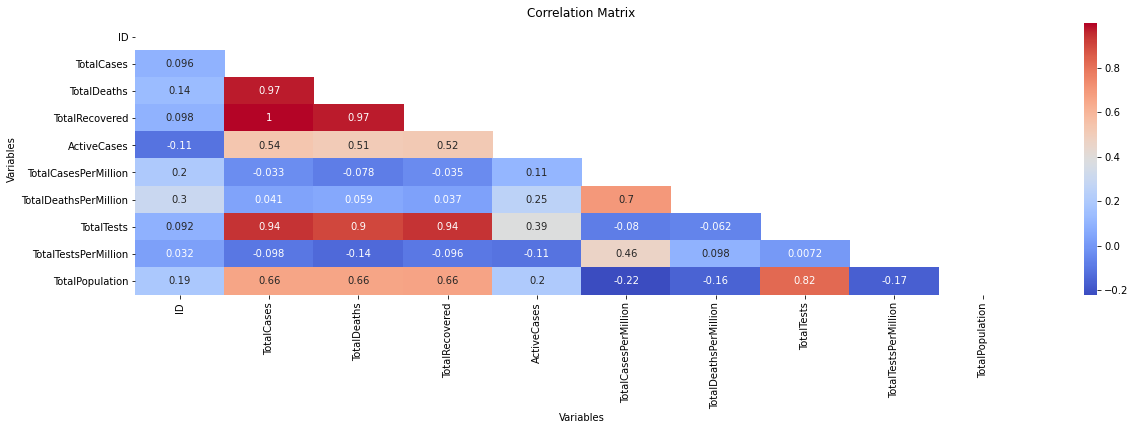

In [210]:
plt.subplots(figsize=(20, 5));
sns.heatmap(data2.corr(), annot = True, cmap = "coolwarm", mask = np.triu(data2.corr()));
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables");

In [211]:
# Recuperer les varaibles ayant une certaine corélation 
def corr_selection(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [217]:
corr_features = corr_selection(data2, 0.9)
corr_features

{'TotalDeaths', 'TotalRecovered', 'TotalTests'}

In [218]:
data2=data2.drop(["ID", "Country",],axis=1)

## Number of clusters

In [219]:
X2 = StandardScaler().fit_transform(data2)

In [220]:
sumSqDistance = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X2)
    sumSqDistance.append(km.inertia_)

C:\Users\bsully\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


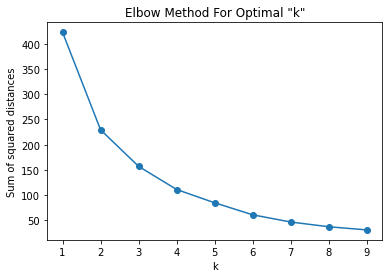

In [225]:
plt.plot(K, sumSqDistance, '-o')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal "k"')
plt.show()

In [226]:
from sklearn import metrics
#utilisation de la métrique "silhouette" #faire varier le nombre de clusters de 2 à 10
res = np.arange(10,dtype="double")
for k in np.arange(10):
    km = KMeans(n_clusters=k+2)
    km.fit(X2)
    res[k] = metrics.silhouette_score(X2,km.labels_)
print(res)

[0.79181214 0.3960937  0.43037223 0.43849765 0.45874069 0.42635655
 0.40468206 0.36750489 0.43752458 0.37332103]


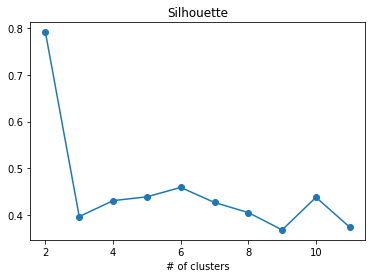

In [228]:
#graphique
import matplotlib.pyplot as plt 
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,12,1),res, '-o') 
plt.show()

In [229]:
kmean = KMeans(n_clusters= 2)
kmeans_model=kmean.fit(X2)
kmean.predict(X2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [230]:
np.unique(kmean.labels_,return_counts=True)

(array([0, 1]), array([46,  1], dtype=int64))

In [232]:
# warnings.filterwarnings('ignore')
data2["labels"]=kmean.labels_
data2["labels"] # si on veux voir quelle observation 

0     0
1     0
2     0
3     0
4     0
     ..
44    0
45    0
46    0
47    0
48    0
Name: labels, Length: 47, dtype: int32

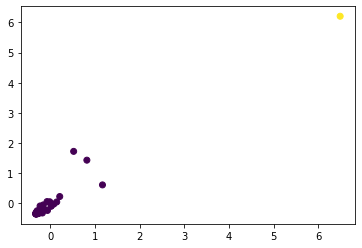

In [235]:
plt.scatter(X2[:,0],X2[:,1],c=kmean.predict(X2));

### Avec la metrics.silhouette_score,lescore est compris entre -1 pour un clustering incorrect et +1 pour un clustering très dense.
### Les scores autour de zéro indiquent des clusters qui se chevauchent.
### Le score est plus élevé lorsque les clusters sont denses et bien séparés, ce qui correspond à un concept standard de cluster.

In [236]:
labels = kmeans_model.labels_
print(metrics.silhouette_score(X2, labels, metric='euclidean'))
print(metrics.calinski_harabasz_score(X2, labels))


0.7918121355123672
37.98447208675011


# GaussianMixture

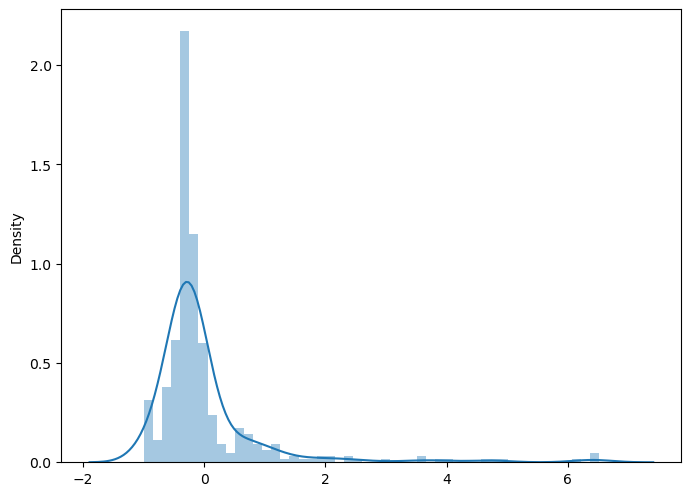

In [237]:
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(X2, bins=50, kde=True, norm_hist=True, label='Normal distribution 1');

In [240]:
print("Covariance matrix :\n", np.cov(X2))# permet de justifier l'utilisation full 

Covariance matrix :
 [[ 0.06989536  0.07362163  0.06687926 ... -0.04525972 -0.2161928
   0.05941565]
 [ 0.07362163  0.08958447  0.06869046 ... -0.04754596 -0.21560307
   0.06616431]
 [ 0.06687926  0.06869046  0.06548446 ... -0.0467251  -0.22747882
   0.0548924 ]
 ...
 [-0.04525972 -0.04754596 -0.0467251  ...  0.05951585  0.26272474
  -0.03161223]
 [-0.2161928  -0.21560307 -0.22747882 ...  0.26272474  1.21689354
  -0.1469064 ]
 [ 0.05941565  0.06616431  0.0548924  ... -0.03161223 -0.1469064
   0.057622  ]]


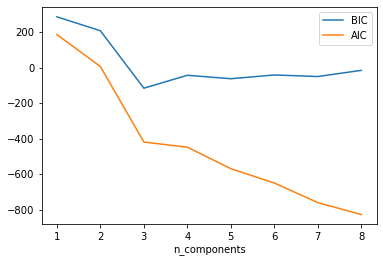

In [241]:
n_components = np.arange(1, 9)
models = [GaussianMixture(n,random_state=0,covariance_type="full").fit(X2)
          for n in n_components]

plt.plot(n_components, [m.bic(X2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [242]:
# fit model
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components = 3, init_params = 'random')
GMM.fit(X2)
print('Converged:', GMM.converged_) # check if the model has converged

Converged: True


In [243]:
gmm= GaussianMixture(n_components=2)
gmm.fit(X2)
gmm.predict(X2)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

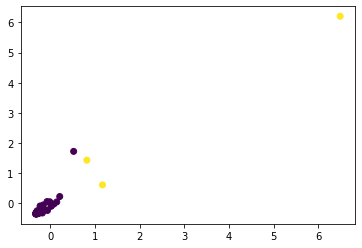

In [244]:
plt.scatter(X2[:,0],X2[:,1],c=gmm.predict(X2));